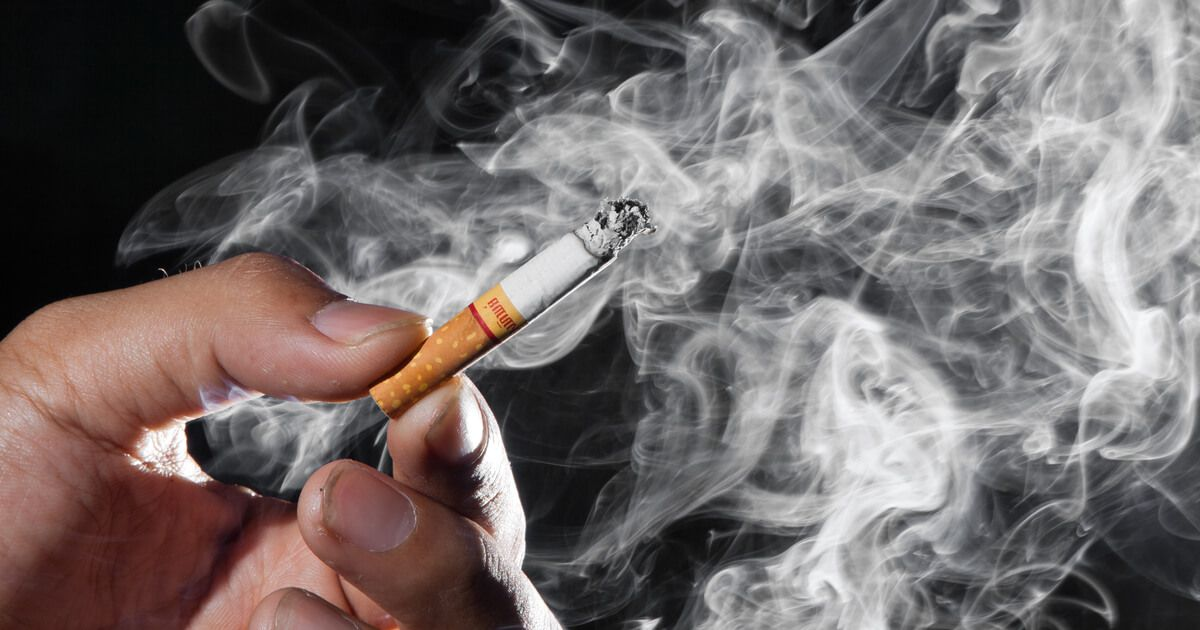

This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals using classification algorithms. The raw dataset consists of 27 unique features and 55692 unique rows.

**1) Import necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import chi2

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**2)Loading the dataset for further process**

In [ ]:
df=pd.read_csv('/content/smoking.csv')
df.style.background_gradient(cmap = "Purples")


**3) Data cleaning**

In [ ]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [ ]:
df['oral'].value_counts()

,count
oral,
Y,55692


In [ ]:
df.drop(['ID','oral'],axis=1,inplace=True)

In [ ]:
df = df.rename(columns={'height(cm)':'height','weight(kg)':'weight','waist(cm)':'waist','eyesight(left)': 'eyesight_left', 'eyesight(right)': 'eyesight_right', 'hearing(left)':'hearing_left','hearing(right)':'hearing_right','fasting blood sugar':'fasting_blood_sugar','Urine protein':'Urine_protein','serum creatinine':'serum_creatinine','dental caries':'dental_caries'})
df

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,N,0


*checking if there is any missing values*

In [ ]:
df.isna().sum()

,0
gender,0
age,0
height,0
weight,0
waist,0
eyesight_left,0
eyesight_right,0
hearing_left,0
hearing_right,0
systolic,0


*checking the data types*

In [ ]:
df.dtypes

,0
gender,object
age,int64
height,int64
weight,int64
waist,float64
eyesight_left,float64
eyesight_right,float64
hearing_left,float64
hearing_right,float64
systolic,float64


*converting object to numeric values*

In [ ]:
encoder=LabelEncoder()
df['gender']=encoder.fit_transform(df['gender'])
df['tartar']=encoder.fit_transform(df['tartar'])
df

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


**4) Data visualization**

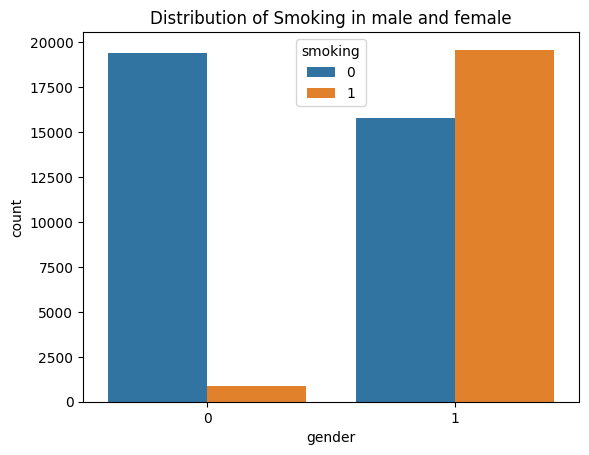

In [ ]:
sns.countplot(x='gender',data=df,hue='smoking')
plt.title('Distribution of Smoking in male and female')
plt.show()

**Inference:** *presence of smoking is higher in males.*

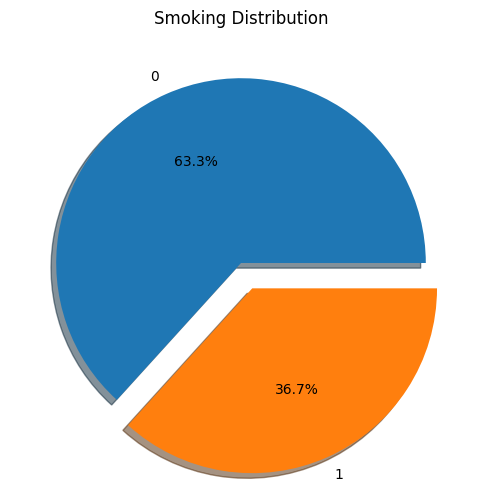

In [ ]:
category_counts = df['smoking'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',explode = [0, 0.15],shadow = True)
plt.title('Smoking Distribution')
plt.show()


**Inference:** *the dataset is imbalanced. count of zero is higher than count of* 1

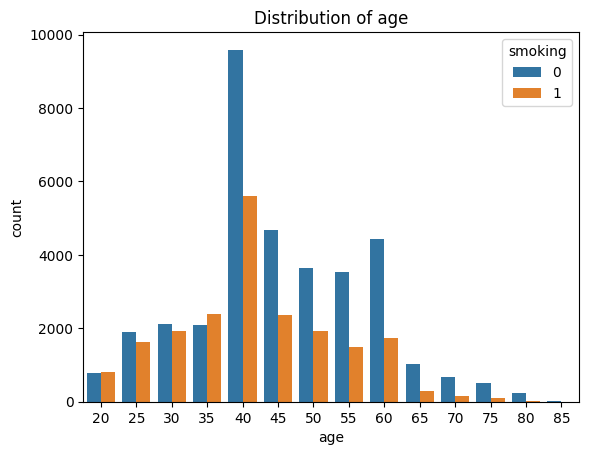

In [ ]:
sns.countplot(x='age',data=df,hue='smoking')
plt.title('Distribution of age')
plt.show()

**Inference:** *people whose age is between 20-60 shows higher smoking habits*

In [ ]:
#sns.pairplot(df)

Inference: shows correlation between each column

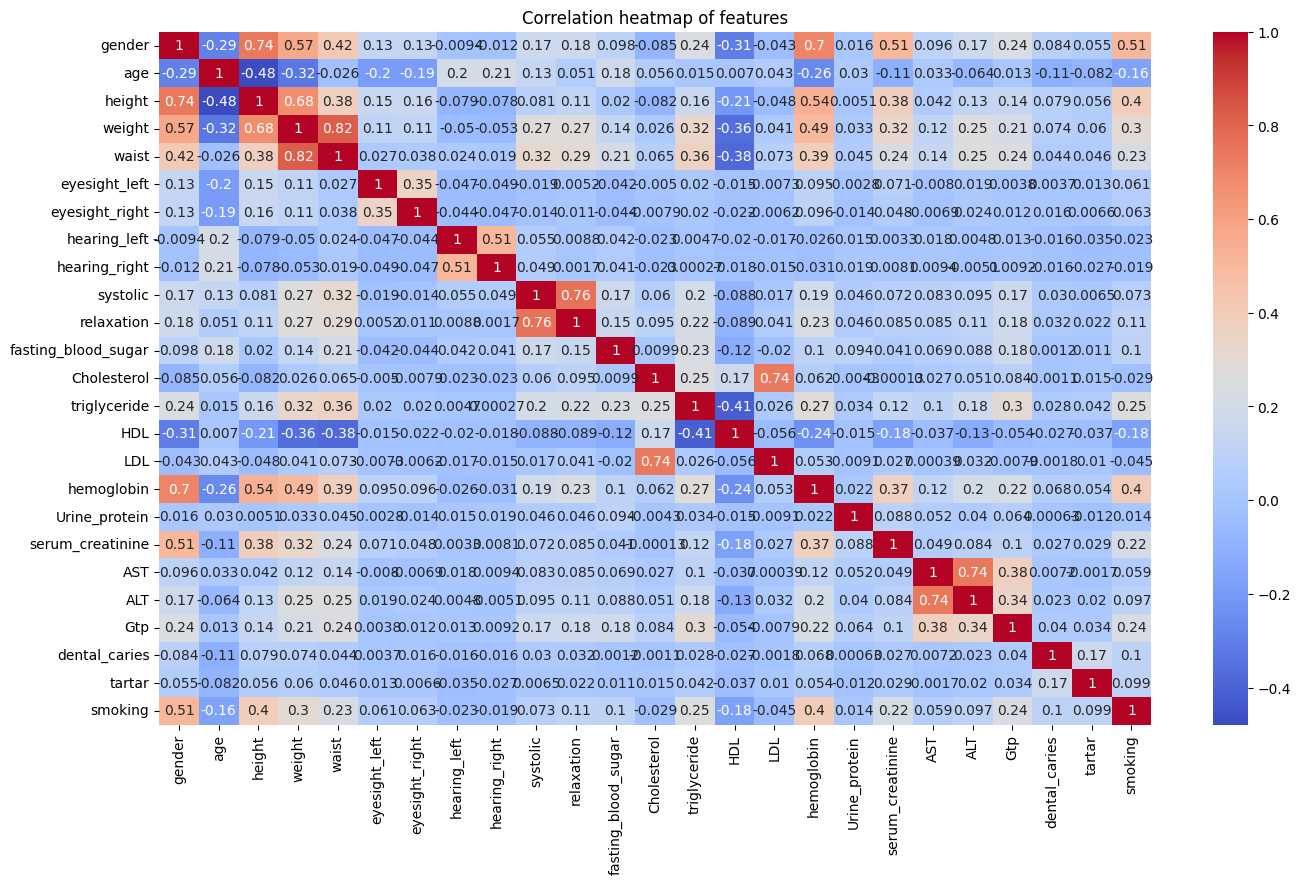

In [ ]:
plt.figure(figsize=(16,9))
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap of features')
plt.show()

**Inference:** *heatmap showing the correlation between each features. Here, gender has highest correlation with the output and Urine_protein has the lowest correlation with the output*

**5) Splitting the data into features and target**

In [ ]:
X=df.iloc[:,:-1]
X

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,dental_caries,tartar
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0


In [ ]:
y=df.iloc[:,-1]
y

,smoking
0,0
1,0
2,1
3,0
4,0
...,...
55687,0
55688,0
55689,0
55690,0


**6) Scaling the features**

In [ ]:
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled

array([[0.        , 0.30769231, 0.41666667, ..., 0.0260521 , 0.        ,
        1.        ],
       [0.        , 0.30769231, 0.5       , ..., 0.01703407, 0.        ,
        1.        ],
       [1.        , 0.53846154, 0.66666667, ..., 0.02104208, 0.        ,
        0.        ],
       ...,
       [0.        , 0.53846154, 0.5       , ..., 0.01102204, 0.        ,
        0.        ],
       [1.        , 0.61538462, 0.58333333, ..., 0.01703407, 0.        ,
        0.        ],
       [1.        , 0.53846154, 0.5       , ..., 0.04008016, 0.        ,
        1.        ]])

**7) Spliting the data for training and testing**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

**8) model building and evaluating the accuracy of the model**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xg=XGBClassifier(random_state=1)
models=[knn,sv,nb,dt,rf,ab,gb,xg]
for model in models:
  print('*****************************',model,'**********************************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

***************************** KNeighborsClassifier() **********************************
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     10531
           1       0.64      0.62      0.63      6177

    accuracy                           0.73     16708
   macro avg       0.71      0.71      0.71     16708
weighted avg       0.73      0.73      0.73     16708

***************************** SVC() **********************************
              precision    recall  f1-score   support

           0       0.84      0.75      0.79     10531
           1       0.63      0.75      0.69      6177

    accuracy                           0.75     16708
   macro avg       0.73      0.75      0.74     16708
weighted avg       0.76      0.75      0.75     16708

***************************** GaussianNB() **********************************
              precision    recall  f1-score   support

           0       0.86      0.64      0.73     10531


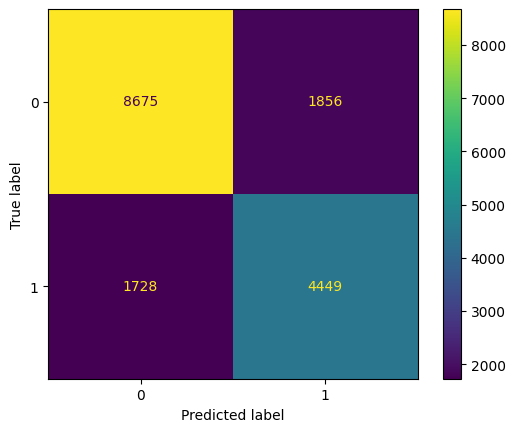

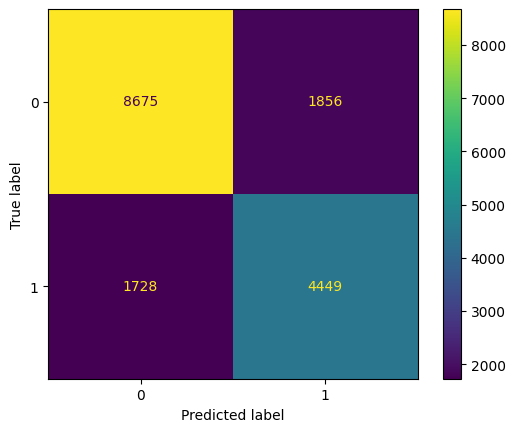

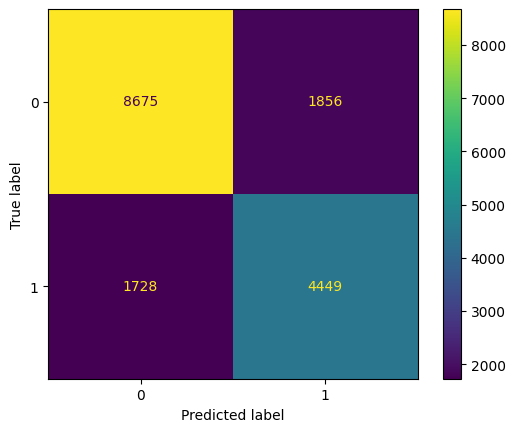

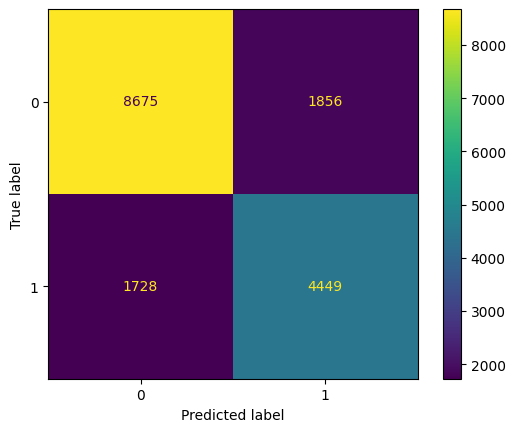

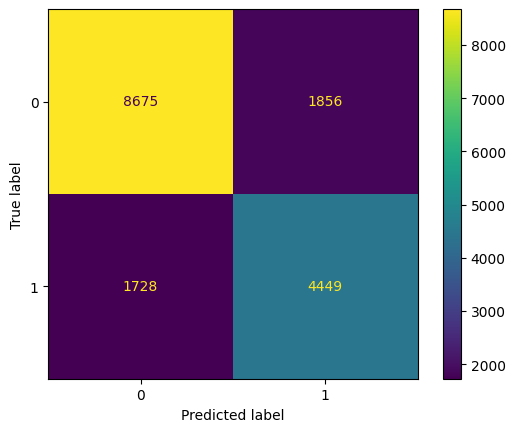

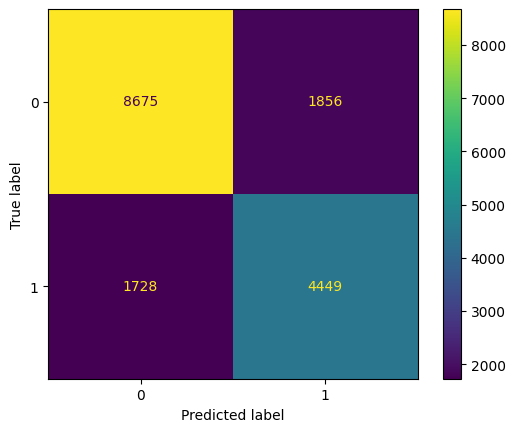

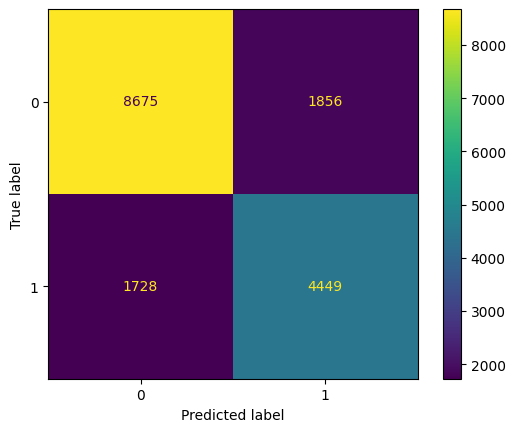

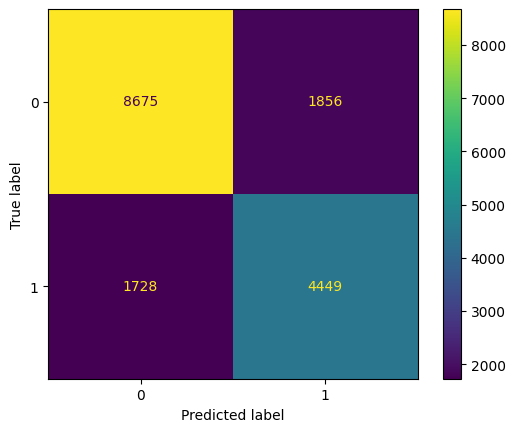

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
for model in models:
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**9) Over sampling for making the dataset balanced**

In [ ]:
from imblearn.over_sampling import SMOTE
osl=SMOTE(random_state=1)
x_os,y_os=osl.fit_resample(X,y)
y_os.value_counts()

,count
smoking,
0,35237
1,35237


In [ ]:
scaler_os=MinMaxScaler()
X_os_scaled=scaler_os.fit_transform(x_os)
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,test_size=0.3,random_state=1)

In [ ]:
knn_os=KNeighborsClassifier(n_neighbors=5)
sv_os=SVC()
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf_os=RandomForestClassifier(random_state=1)
ab_os=AdaBoostClassifier(random_state=1)
gb_os=GradientBoostingClassifier(random_state=1)
xg_os=XGBClassifier(random_state=1)
models=[knn_os,sv_os,nb_os,dt_os,rf_os,ab_os,gb_os,xg_os]
for model in models:
  print('*****************************',model,'**********************************')
  model.fit(X_os_train,y_os_train)
  y_pred_os=model.predict(X_os_test)
  print(classification_report(y_os_test,y_pred_os))

***************************** KNeighborsClassifier() **********************************
              precision    recall  f1-score   support

           0       0.81      0.69      0.75     10687
           1       0.73      0.84      0.78     10456

    accuracy                           0.76     21143
   macro avg       0.77      0.76      0.76     21143
weighted avg       0.77      0.76      0.76     21143

***************************** SVC() **********************************
              precision    recall  f1-score   support

           0       0.92      0.56      0.70     10687
           1       0.68      0.95      0.79     10456

    accuracy                           0.75     21143
   macro avg       0.80      0.76      0.75     21143
weighted avg       0.80      0.75      0.74     21143

***************************** GaussianNB() **********************************
              precision    recall  f1-score   support

           0       0.82      0.61      0.70     10687


**10) Feature selection**

In [ ]:
x_os.columns

Index(['gender', 'age', 'height', 'weight', 'waist', 'eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine_protein', 'serum_creatinine', 'AST',
       'ALT', 'Gtp', 'dental_caries', 'tartar'],
      dtype='object')

In [ ]:
features=['gender', 'age', 'height', 'weight', 'waist',
       'eyesight_left', 'eyesight_right', 'hearing_left', 'hearing_right',
       'systolic', 'relaxation', 'fasting_blood_sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine_protein',
       'serum_creatinine', 'AST', 'ALT', 'Gtp', 'dental_caries',
       'tartar']
ch_values,p_values=chi2(X_os_scaled,y_os)
chi2_results=pd.DataFrame({'feature': features,'chi2 score': ch_values,'p-value': p_values})
print(chi2_results)

                feature   chi2 score        p-value
0                gender  6328.163862   0.000000e+00
1                   age   208.389828   3.084367e-47
2                height   458.608072  9.656056e-102
3                weight   280.657683   5.398538e-63
4                 waist   131.158907   2.285578e-30
5         eyesight_left     7.819814   5.167653e-03
6        eyesight_right     8.176540   4.243562e-03
7          hearing_left    47.736283   4.875838e-12
8         hearing_right    38.569539   5.283716e-10
9              systolic     8.438240   3.674118e-03
10           relaxation    21.818952   2.996259e-06
11  fasting_blood_sugar    12.065032   5.137643e-04
12          Cholesterol     1.718820   1.898450e-01
13         triglyceride   196.627897   1.136922e-44
14                  HDL    16.803693   4.145255e-05
15                  LDL     1.265192   2.606707e-01
16           hemoglobin   185.515826   3.028235e-42
17        Urine_protein     2.257549   1.329644e-01
18     serum

In [ ]:
high_p_values=chi2_results[chi2_results['p-value']>0.05]
print(high_p_values)

          feature  chi2 score   p-value
12    Cholesterol    1.718820  0.189845
15            LDL    1.265192  0.260671
17  Urine_protein    2.257549  0.132964
19            AST    2.994103  0.083568


*droping the features which has p-value greater than 0.05*

In [ ]:
x_os.drop(['Cholesterol','LDL','Urine_protein','AST'],axis=1,inplace=True)
x_os

,gender,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,triglyceride,HDL,hemoglobin,serum_creatinine,ALT,Gtp,dental_caries,tartar
0,0,40,155,60,81.300000,1.200000,1.000000,1.0,1.0,114.000000,73.000000,94.000000,82.000000,73.000000,12.900000,0.700000,19.000000,27.000000,0,1
1,0,40,160,60,81.000000,0.800000,0.600000,1.0,1.0,119.000000,70.000000,130.000000,115.000000,42.000000,12.700000,0.600000,19.000000,18.000000,0,1
2,1,55,170,60,80.000000,0.800000,0.800000,1.0,1.0,138.000000,86.000000,89.000000,182.000000,55.000000,15.800000,1.000000,16.000000,22.000000,0,0
3,1,40,165,70,88.000000,1.500000,1.500000,1.0,1.0,100.000000,60.000000,96.000000,254.000000,45.000000,14.700000,1.000000,26.000000,18.000000,0,1
4,0,40,155,60,86.000000,1.000000,1.000000,1.0,1.0,120.000000,74.000000,80.000000,74.000000,62.000000,12.500000,0.600000,14.000000,22.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70469,1,45,164,76,90.575367,1.114384,1.285960,1.0,1.0,128.856158,89.428079,127.428079,261.434972,53.431525,15.713695,0.785616,32.284237,315.318701,0,0
70470,1,40,175,65,82.000000,1.000000,1.200000,1.0,1.0,130.000000,80.000000,107.000000,94.000000,51.000000,15.000000,0.700000,17.000000,23.000000,0,0
70471,1,36,170,74,80.865618,0.861148,0.861148,1.0,1.0,115.375828,81.764349,115.165563,196.000000,47.847130,15.838852,1.184713,57.764349,81.458609,0,1
70472,1,60,162,67,83.575743,0.856064,0.813639,1.0,1.0,130.848515,80.575743,103.560643,139.560643,62.302971,15.342426,1.156064,41.818316,137.697029,0,1


In [ ]:
scaler_chi=MinMaxScaler()
X_chi_scaled=scaler_chi.fit_transform(x_os)
X_chi_scaled

array([[0.        , 0.30769231, 0.41666667, ..., 0.0260521 , 0.        ,
        1.        ],
       [0.        , 0.30769231, 0.5       , ..., 0.01703407, 0.        ,
        1.        ],
       [1.        , 0.53846154, 0.66666667, ..., 0.02104208, 0.        ,
        0.        ],
       ...,
       [1.        , 0.24615385, 0.66666667, ..., 0.08061985, 0.        ,
        1.        ],
       [1.        , 0.61538462, 0.53333333, ..., 0.13697097, 0.        ,
        1.        ],
       [1.        , 0.33846154, 0.58333333, ..., 0.05189802, 0.        ,
        0.        ]])

In [ ]:
X_chi_train,X_chi_test,y_chi_train,y_chi_test=train_test_split(X_chi_scaled,y_os,test_size=0.3,random_state=1)

In [ ]:
acc=[]
knn_chi=KNeighborsClassifier(n_neighbors=5)
sv_chi=SVC()
nb_chi=GaussianNB()
dt_chi=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf_chi=RandomForestClassifier(random_state=1)
ab_chi=AdaBoostClassifier(random_state=1)
gb_chi=GradientBoostingClassifier(random_state=1)
xg_chi=XGBClassifier(random_state=1)
models=[knn_chi,sv_chi,nb_chi,dt_chi,rf_chi,ab_chi,gb_chi,xg_chi]
for model in models:
  print('*****************************',model,'**********************************')
  model.fit(X_chi_train,y_chi_train)
  y_pred_chi=model.predict(X_chi_test)
  print(classification_report(y_chi_test,y_pred_chi))
  acc.append(accuracy_score(y_chi_test,y_pred_chi))

***************************** KNeighborsClassifier() **********************************
              precision    recall  f1-score   support

           0       0.81      0.69      0.75     10687
           1       0.73      0.83      0.78     10456

    accuracy                           0.76     21143
   macro avg       0.77      0.76      0.76     21143
weighted avg       0.77      0.76      0.76     21143

***************************** SVC() **********************************
              precision    recall  f1-score   support

           0       0.92      0.57      0.70     10687
           1       0.68      0.95      0.79     10456

    accuracy                           0.75     21143
   macro avg       0.80      0.76      0.75     21143
weighted avg       0.80      0.75      0.75     21143

***************************** GaussianNB() **********************************
              precision    recall  f1-score   support

           0       0.83      0.61      0.70     10687


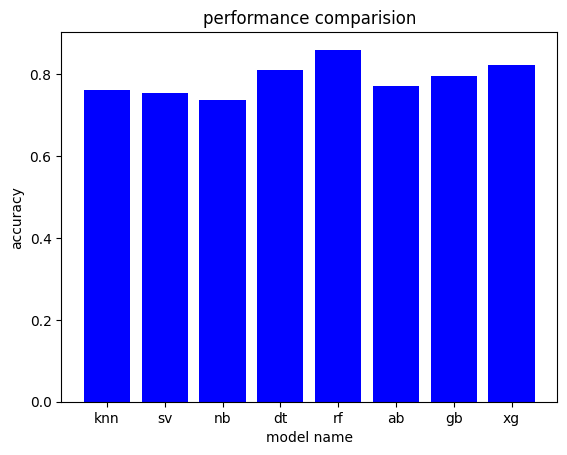

In [ ]:
model_names=['knn','sv','nb','dt','rf','ab','gb','xg']
plt.bar(model_names,acc,color='b')
plt.xlabel('model name')
plt.ylabel('accuracy')
plt.title('performance comparision')
plt.show()

**11) Hyperparameter tuning**

In [ ]:
params={'criterion':['gini', 'entropy', 'log_loss'], 'random_state':[1,2,3,4,5,6], 'n_estimators':[10,50,100]}

In [ ]:
X_hp_train,X_hp_test,y_hp_train,y_hp_test=train_test_split(X_chi_scaled,y_os,test_size=0.3,random_state=1)


In [ ]:
clf=RandomizedSearchCV(rf_chi,params,cv=5,scoring='accuracy',random_state=1)
clf.fit(X_hp_train,y_hp_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'n_estimators': [10, 50, 100],
                                        'random_state': [1, 2, 3, 4, 5, 6]},
                   random_state=1, scoring='accuracy')

In [ ]:
clf.best_params_

{'random_state': 3, 'n_estimators': 100, 'criterion': 'entropy'}

In [ ]:
pred_hp=clf.predict(X_hp_test)
print(classification_report(y_hp_test,pred_hp))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85     10687
           1       0.82      0.92      0.87     10456

    accuracy                           0.86     21143
   macro avg       0.86      0.86      0.86     21143
weighted avg       0.87      0.86      0.86     21143



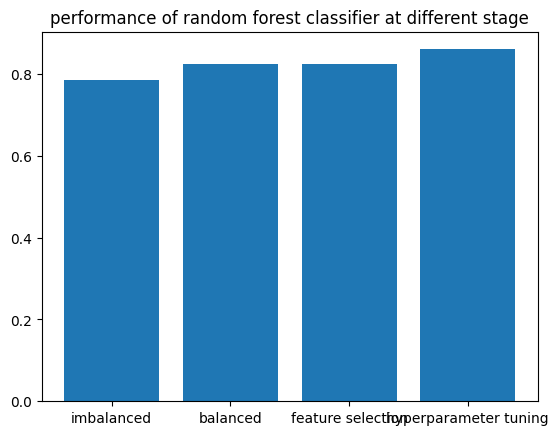

In [ ]:
cases=['imbalanced','balanced','feature selection','hyperparameter tuning']
test=[y_test,y_os_test,y_chi_test,y_hp_test]
preds=[y_pred,y_pred_os,y_pred_chi,pred_hp]
scores=[]
for i in range(4):
  scores.append(accuracy_score(test[i],preds[i]))
plt.title('performance of random forest classifier at different stage')
plt.bar(cases,scores)
plt.show()

**Inference:** *model created after hyperparameter tuning shows highest accuracy*

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_hp_test, pred_hp)
roc_auc = roc_auc_score(y_hp_test, pred_hp)

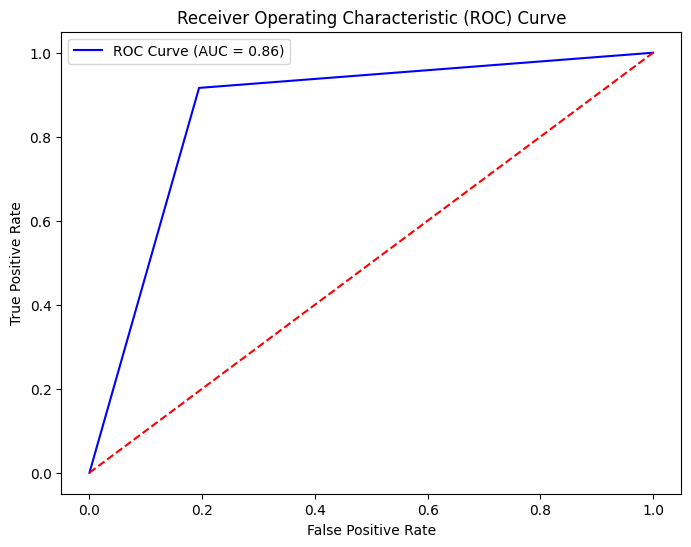

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**12) Saving the model to create GUI**

In [ ]:
import pickle
pickle.dump(clf,open('smoking_model.sav','wb'))
pickle.dump(scaler_chi,open('smoking_scaler.sav','wb'))